<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/TP2/7506R_TP2_GRUPO2_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2: Críticas cinematográficas</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Tokens y preprocesamiento
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter
import spacy
from nltk.corpus import stopwords

# nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Modelos
import joblib
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, make_scorer

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from keras import layers

import warnings
warnings.filterwarnings("ignore")

RAND_SEED = 42

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# !pip install keras==2.12.0
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.12.0

# Lectura de archivo


### Desde google drive

In [ ]:
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/7506R-1C2024-GRUPO02/TP2/"

Mounted at /content/drive


### Desde maquina local

In [ ]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# root_path = "./"

In [ ]:
train_path = root_path + 'Dataset/train.csv'
test_path = root_path + 'Dataset/test.csv'
normalizado_path = root_path + 'Dataset/sentimientos_limpios.csv'
sample_path = root_path + 'Dataset/sample_solution.csv'
ds_train = pd.read_csv(train_path)
ds_test = pd.read_csv(test_path)
sample = pd.read_csv(sample_path)
ds_normalizado = pd.read_csv(normalizado_path)

# Visualizamos los datasets

In [ ]:
ds_train.info()
ds_test.info()
ds_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50000 non-null  int64 
 1   review_es    50000 non-null  object
 2   sentimiento  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599 entries, 0 to 8598
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8599 non-null   int64 
 1   review_es  8599 non-null   object
dtypes: int64(1), object(1)
memory usage: 134.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50000 non-null  int64 
 1   review_es    50000 non-null  object
 2   sentimiento  50000 non-null  object
 3   revie

In [ ]:
ds_train

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo


In [ ]:
ds_normalizado

,ID,review_es,sentimiento,review_norm
0,0,Uno de los otros críticos ha mencionado que de...,positivo,critico haber mencionar despues ver solo oz ep...
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,pequeno pequeno produccion tecnica filmacion s...
2,2,Pensé que esta era una manera maravillosa de p...,positivo,pensar ser manera maravilloso pasar tiempo fin...
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,basicamente haber familia nino pequeno jake pe...
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,amor tiempo petter mattei ser pelicula visualm...
...,...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo,pensar pelicula hacer buen trabajo derecha ser...
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,mala parcela mal dialogo malo actuacion direcc...
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo,ser catolico ensenado escuela primario parroqu...
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo,ir tener desacuerdo comentario anterior lado m...


Dividimos el dataset de train en x_train e y_train (la primera tendra el texto y la segunda las labels).

Adicionalmente no incluiremos la columna ID ya que no es necesaria para nuestro proposito de entrenamiento.

In [ ]:
x_train_text_completo = ds_train["review_es"]
y_train_completo = ds_train["sentimiento"]

In [ ]:
x_train_text_norm = ds_normalizado["review_norm"]
y_train_norm = ds_normalizado["sentimiento"]

In [ ]:
ds_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


Creamos el dataset de x_test sin incluir el id

In [ ]:
x_test_text = ds_test["review_es"]

# Preprocesamiento

## Division de train y validation

Dividimos el training set en training y validating sets

In [ ]:
x_train_text, x_validation_text, y_train, y_validation = train_test_split(
    ds_normalizado['review_norm'], ds_normalizado["sentimiento"],
    stratify=ds_normalizado["sentimiento"],
    test_size=0.20,
    random_state=RAND_SEED
    )

## Normalizacion

## Vectorizacion

### Utils

Creacion de algunas funciones de utilidad

In [ ]:
def plot_confussion_matrix(true, pred):
  #Creo matriz de confusión
  tabla = confusion_matrix(true, pred)

  #Grafico matriz de confusión
  sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicciones')
  plt.ylabel('Verdaderos')

  #Reporte
  print(classification_report(true, pred))

In [ ]:
def build_results(pred):
  res = ds_test.copy()
  res.drop(columns=["review_es"], inplace=True)
  res['sentimiento'] = pred
  return res

In [ ]:
def print_positive_negatives(sentimientos):
  total_positives = (sentimientos == "positivo").sum()
  total_negatives = (sentimientos == "negativo").sum()
  print(f"Positives: {total_positives}\nNegatives: {total_negatives}")

# Red Neuronal

## Modelos

Para esta red neuronal utilizamos la reducción de palabras, pues requerimos la menor cantidad de neuronas posibles para realizar la red. Si tenemos muchas neuronas conectadas vamos a generar overfiting.

In [ ]:
reviews = ds_normalizado['review_norm'].tolist()
len(reviews)

50000

Como tengo 50000 palabras debo deshacerme de varias. Decido mantener el 25% de estas palabras

In [ ]:
#Tokenización y secuenciación de texto
max_words = 12500
max_longitud_secuencia = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

#Obtencion del diccionario de palabras a índices
word_index = tokenizer.word_index

#Secuencias de tokens
sequences = tokenizer.texts_to_sequences(reviews)
sequences_prueba = tokenizer.texts_to_sequences(ds_test['review_es'].tolist())

data = pad_sequences(sequences, maxlen=max_longitud_secuencia)
test_padded = pad_sequences(sequences_prueba, maxlen=max_longitud_secuencia)


In [ ]:
data

array([[    0,     0,     0, ...,   238,     8,   389],
       [    0,     0,     0, ...,  1329,    27,    54],
       [    0,     0,     0, ...,    34,     5,   129],
       ...,
       [    0,     0,     0, ...,   364,  5918,  3662],
       [    0,     0,     0, ..., 10341,     7,  2437],
       [    0,     0,     0, ...,  1218,   413,     2]], dtype=int32)

In [ ]:
test_padded

array([[   0,    0,    0, ...,    6,    6,  125],
       [   0,    0,    0, ..., 2584,  383,  776],
       [   0,    0,    0, ..., 1171,  558,  558],
       ...,
       [   0,    0,    0, ..., 2746,  226, 2111],
       [   0,    0,    0, ..., 2860, 1041,  524],
       [   0,    0,    0, ...,   10, 9678,  125]], dtype=int32)

Mapeo los sentimientos positivos y negativos.

In [ ]:
ds_normalizado['sentimiento'] = ds_normalizado['sentimiento'].map(lambda x: 1 if x == 'positivo' else 0)


In [ ]:
ds_normalizado

,ID,review_es,sentimiento,review_norm
0,0,Uno de los otros críticos ha mencionado que de...,1,critico haber mencionar despues ver solo oz ep...
1,1,Una pequeña pequeña producción.La técnica de f...,1,pequeno pequeno produccion tecnica filmacion s...
2,2,Pensé que esta era una manera maravillosa de p...,1,pensar ser manera maravilloso pasar tiempo fin...
3,3,"Básicamente, hay una familia donde un niño peq...",0,basicamente haber familia nino pequeno jake pe...
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",1,amor tiempo petter mattei ser pelicula visualm...
...,...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,1,pensar pelicula hacer buen trabajo derecha ser...
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",0,mala parcela mal dialogo malo actuacion direcc...
49997,49997,Soy católica enseñada en escuelas primarias pa...,0,ser catolico ensenado escuela primario parroqu...
49998,49998,Voy a tener que estar en desacuerdo con el com...,0,ir tener desacuerdo comentario anterior lado m...


In [ ]:
df_trabajo_x = ds_normalizado['review_norm']

df_trabajo_y = ds_normalizado['sentimiento'].copy()

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(data,
                                                    df_trabajo_y,
                                                    test_size=0.30,
                                                    random_state=12,
                                                    shuffle=True
                                                    )

In [ ]:
training_padded = np.array(x_train_rnn)
testing_padded = np.array(x_test_rnn)
testing_prueba_padded = np.array(test_padded)

In [ ]:

sequences = training_padded

Los mejores hiperparametros fueron:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dropout, Dense, Embedding

# Parámetros del modelo
vocab_size = max_words  # Increased vocab_size to encompass all tokens
embed_size = 128
conv_filters = 128

# Definición del modelo
model = Sequential([
    Embedding(vocab_size,embed_size,input_shape=[None]),
    Conv1D(filters=conv_filters, kernel_size=3, activation='relu'),
    GRU(128, return_sequences=True),
    GRU(128),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss='binary_crossentropy',
    metrics=['AUC']
)

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1600000   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         49280     
                                                                 
 gru (GRU)                   (None, None, 128)         99072     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1847553 (7.05 MB)
Trainable params: 184755

In [ ]:
class AccuracyEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(AccuracyEarlyStopping, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        pass  # Override to avoid on_epoch_end behavior

    def on_batch_end(self, batch, logs=None):
        current_accuracy = logs.get('accuracy')
        if current_accuracy is not None:
          if current_accuracy >= self.target_accuracy:
              print(f"\nReached {self.target_accuracy} accuracy. Stopping training.")
              self.model.stop_training = True
early_stopping_callback = AccuracyEarlyStopping(target_accuracy=0.984) # and adjust batch size?

In [ ]:
# Verificar si el archivo del modelo existe
import os
model_file = root_path + 'Models/red_neuronal_prueba_v2.pkl'
if os.path.exists(model_file):
    # Cargar el modelo desde el archivo
    model = joblib.load(model_file)
else:
    # Entrenar el modelo y guardar
    model.fit(sequences, y_train_rnn, epochs=4, callbacks=[early_stopping_callback])
    joblib.dump(model, model_file)

Epoch 1/4
1094/1094 [==============================] - 1483s 1s/step - loss: 0.0452 - auc: 0.9977
Epoch 2/4
1094/1094 [==============================] - 1457s 1s/step - loss: 0.0292 - auc: 0.9988
Epoch 3/4
1094/1094 [==============================] - 1451s 1s/step - loss: 0.0245 - auc: 0.9992
Epoch 4/4
1094/1094 [==============================] - 1442s 1s/step - loss: 0.0214 - auc: 0.9993


In [ ]:
y_pred = model.predict(testing_padded)

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

469/469 [==============================] - 155s 325ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7534
           1       0.86      0.86      0.86      7466

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



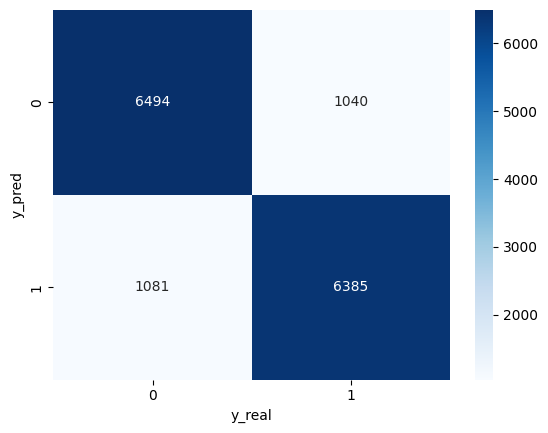

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test_rnn).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test_rnn,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = model.predict(testing_prueba_padded)

269/269 [==============================] - 84s 310ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
ds_resultados=pd.DataFrame({'id': ds_test['ID'], 'sentimiento': y_pred_final})
ds_resultados.head(10)

,id,sentimiento
0,60000,0
1,60001,0
2,60002,0
3,60003,1
4,60004,0
5,60005,1
6,60006,0
7,60007,0
8,60008,1
9,60009,1


In [ ]:
ds_resultados['sentimiento'] = ds_resultados['sentimiento'].replace({1: 'positivo', 0: 'negativo'})

In [ ]:
ds_resultados.to_csv(root_path + 'Dataset/red_neuronal_GRU2.csv', index=False)